In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# T1. Load the slightly modified Titanic survival data into a pandas data frame.

In [80]:
df1=pd.read_csv(r"D:\City Lectures\INM430 DS\W02\Jupyter Notebook labs\titanicSurvival_m.csv")
# df1_copy = df1.copy(deep=True)
df1_copy=pd.read_csv(r"D:\City Lectures\INM430 DS\W02\Jupyter Notebook labs\titanicSurvival_m.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df1.shape

(891, 12)

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         845 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# T2. Find the counts of missing values in each column

In [83]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

# T3. Compute the mean and other descriptive statistics and note these down, you can use this function

In [84]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
df1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,845.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.304319,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.792612,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# T4. Replace the missing values in "Age" and "Fare" columns with 0 values, and visualise in a scatterplot

In [118]:
df1.Age.fillna(0,inplace=True)
df1.Fare.fillna(0,inplace=True)

In [119]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          500
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

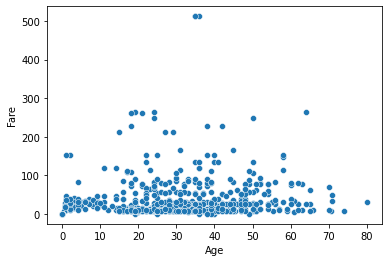

In [120]:
sns.scatterplot(data=df1,x='Age',y='Fare')

# T5. Replace the missing values in "Age" and "Fare" columns with mean values, and visualise in a scatterplot

In [121]:
df1_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          500
Embarked         2
dtype: int64

In [122]:
A_mean=np.mean(df1_copy['Age'])
F_mean=np.mean(df1_copy['Fare'])

In [123]:
df1_copy['Age'].fillna(A_mean, inplace=True)
df1_copy['Fare'].fillna(F_mean, inplace=True)

In [124]:
alt.Chart(df1_copy).mark_point().encode(x='Age',y='Fare').interactive()

alt.Chart(...)

# T6. Reflect on the differences you see in these plots. 

In [125]:
plot1=alt.Chart(df1_copy).mark_point().encode(x='Age',y='Fare').properties(title = "Mean imputed").interactive()
plot2=alt.Chart(df1).mark_point().encode(x='Age',y='Fare').properties(title = "ZERO imputed").interactive()
plot12=alt.hconcat(plot1,plot2)
plot12

alt.HConcatChart(...)

# Answer:
## As when we imputed "0" for all missing values in Age & Fare we can see dark circle at(0,0) where are the marks are scattered in Mean imputed values